#### Part One

In [280]:
import pandas as pd
from plotnine import *
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer

1. bringing in the data

In [281]:
data = pd.read_csv("https://www.dropbox.com/s/bocjjyo1ehr5auz/insurance_costs_1.csv?dl=1")
data = data.dropna()
data.head()

,age,sex,bmi,smoker,region,charges
0,19,female,27.900,yes,southwest,16884.92400
1,33,male,22.705,no,northwest,21984.47061
2,32,male,28.880,no,northwest,3866.85520
3,31,female,25.740,no,southeast,3756.62160
4,60,female,25.840,no,northwest,28923.13692


1.5 summaries

In [282]:
data['smoker'].value_counts()


smoker
no     344
yes     87
Name: count, dtype: int64

There are significantly less smokers than nonsmokers!

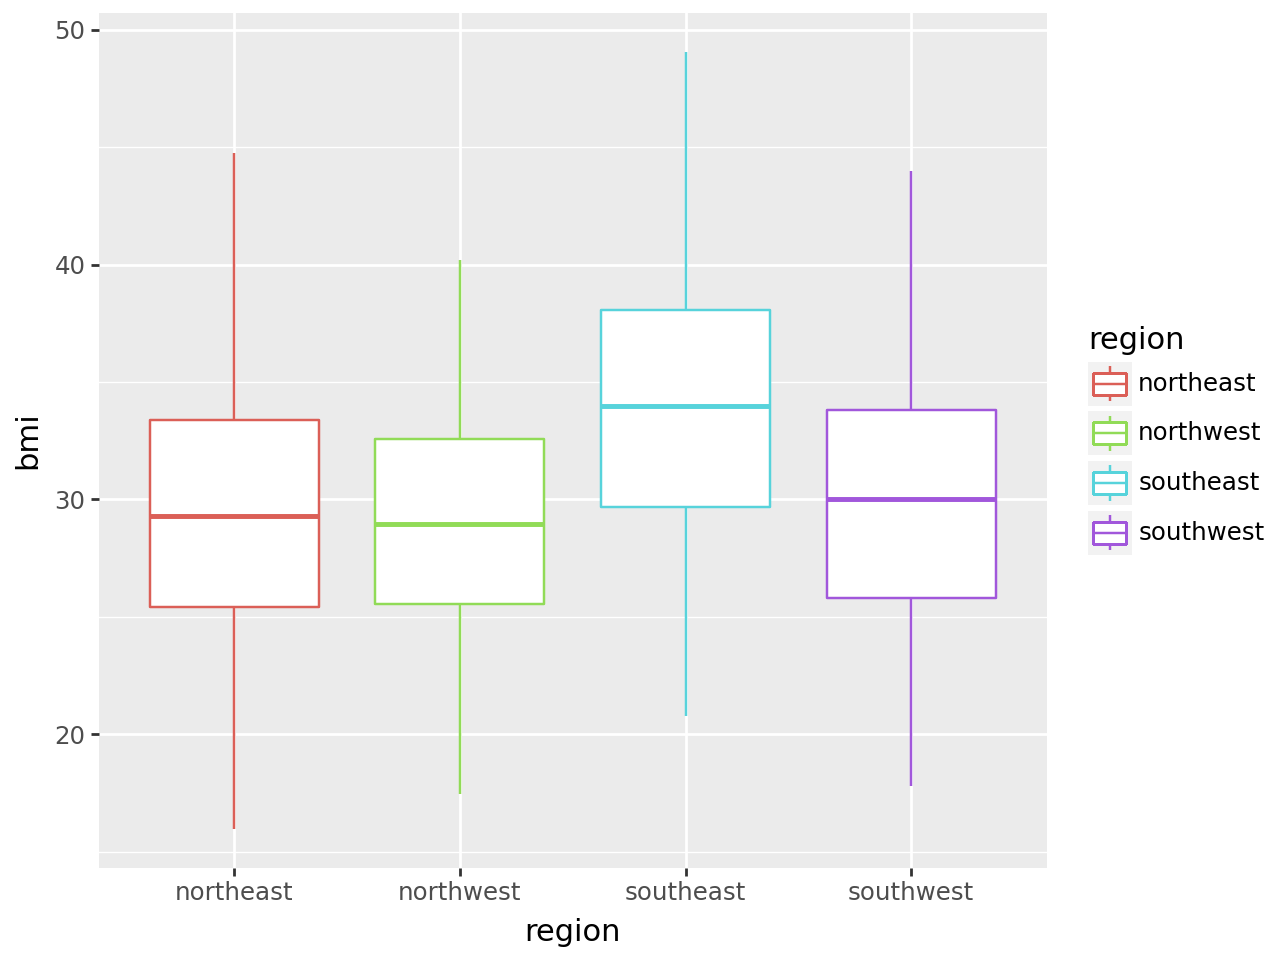

In [283]:
(ggplot(data, aes(x='region', y='bmi', color='region'))
        + geom_boxplot()
        )

The Southeast has a significantly higher median BMI than all other regions as well as its upperquartile 

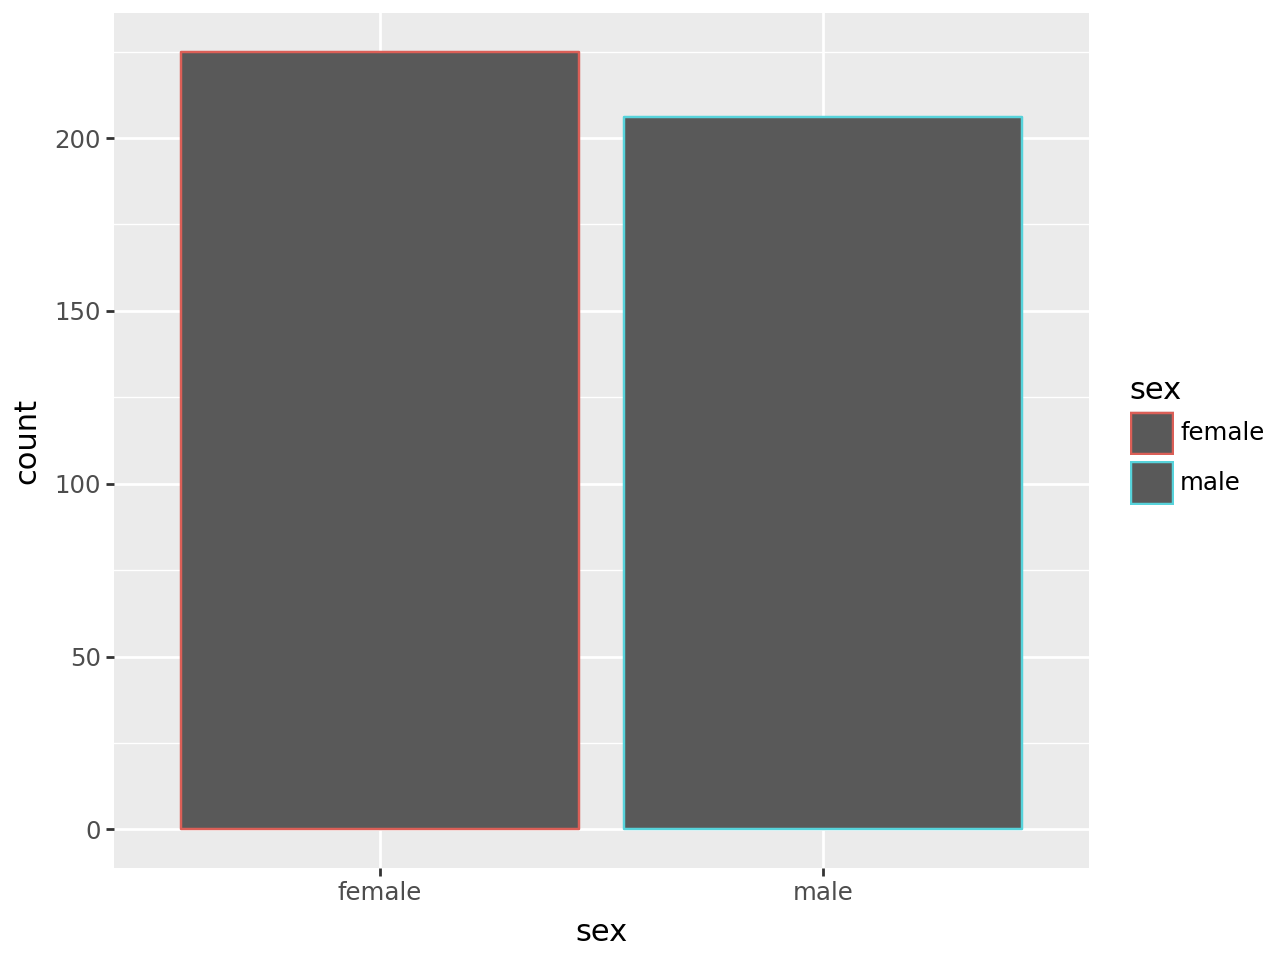

In [284]:
(ggplot(data, aes(x='sex', color = "sex"))
        + geom_bar()
        )

There are slightly more females getting healthcare coverage than males.

#### 2.

Since i already used drop.na before I did the data summaries looking at the data I don't see any other cleaning required

### 3.

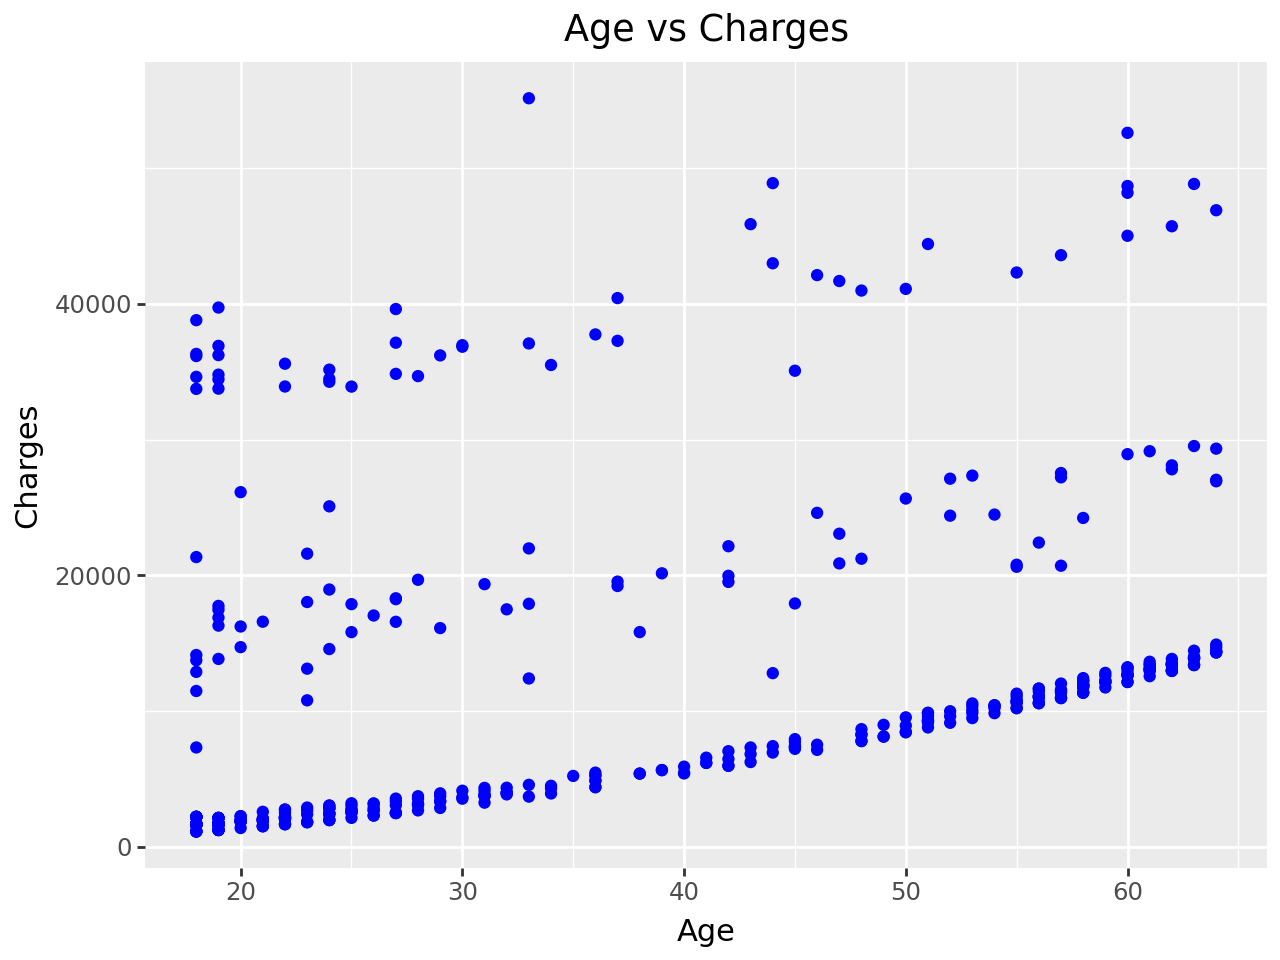

In [286]:
(ggplot(data, aes(x='age', y='charges')) 
        + geom_point(color="blue") 
        + labs(title="Age vs Charges",
               x="Age",
               y="Charges")
       )

There is a clear upwards trend as age increases so does medical costs billed by health insurance. This is an expected trend as more health issues arise as you get older.  

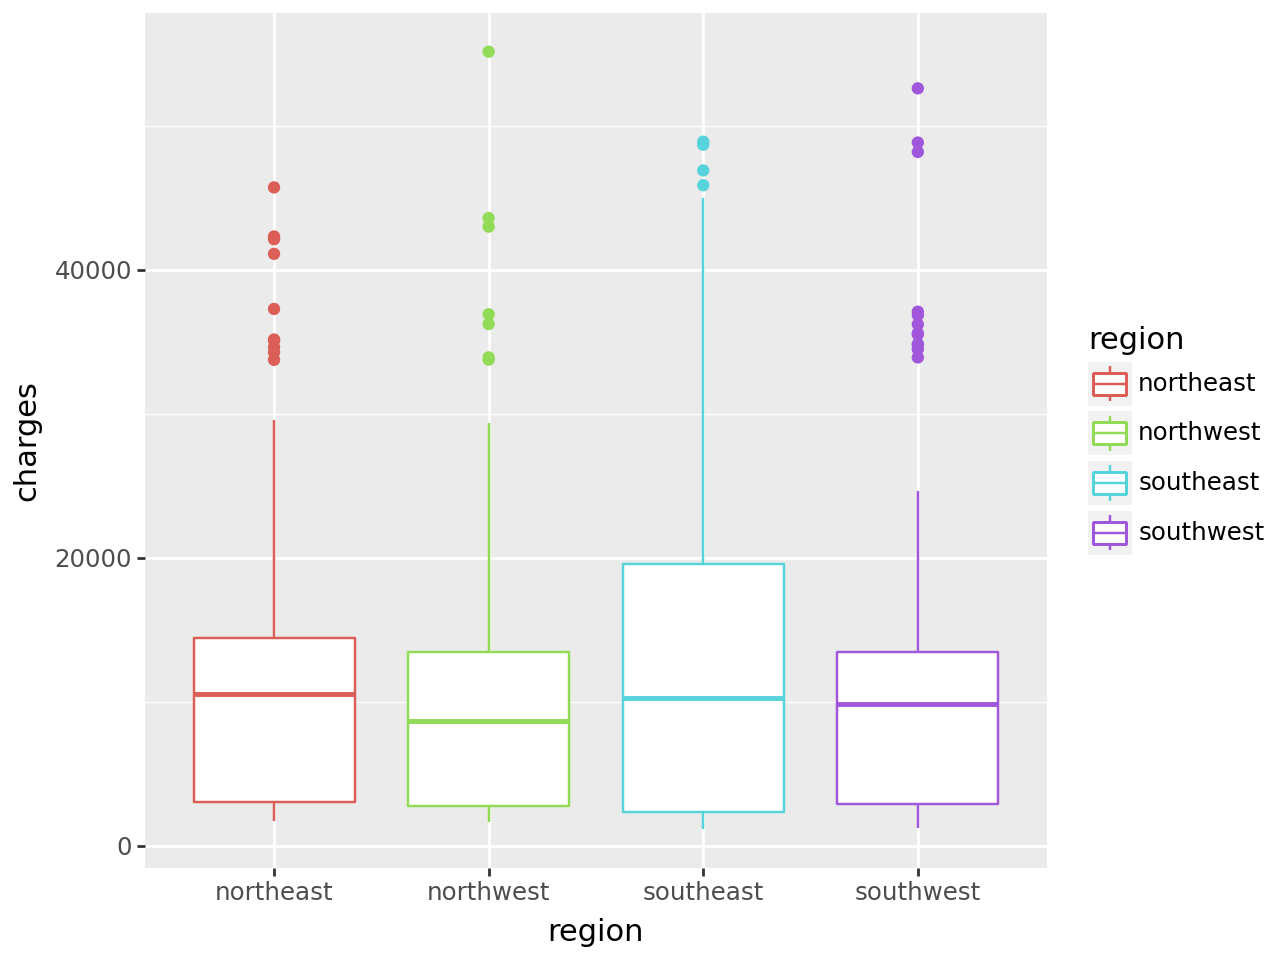

In [287]:
(ggplot(data, aes(x='region', y='charges', color='region'))
        + geom_boxplot()
        )

There is relative consistency in median charges by region, and the outlier for charges by region are similar, but the southeast does have a consistently higher third quartile than the other regions. 

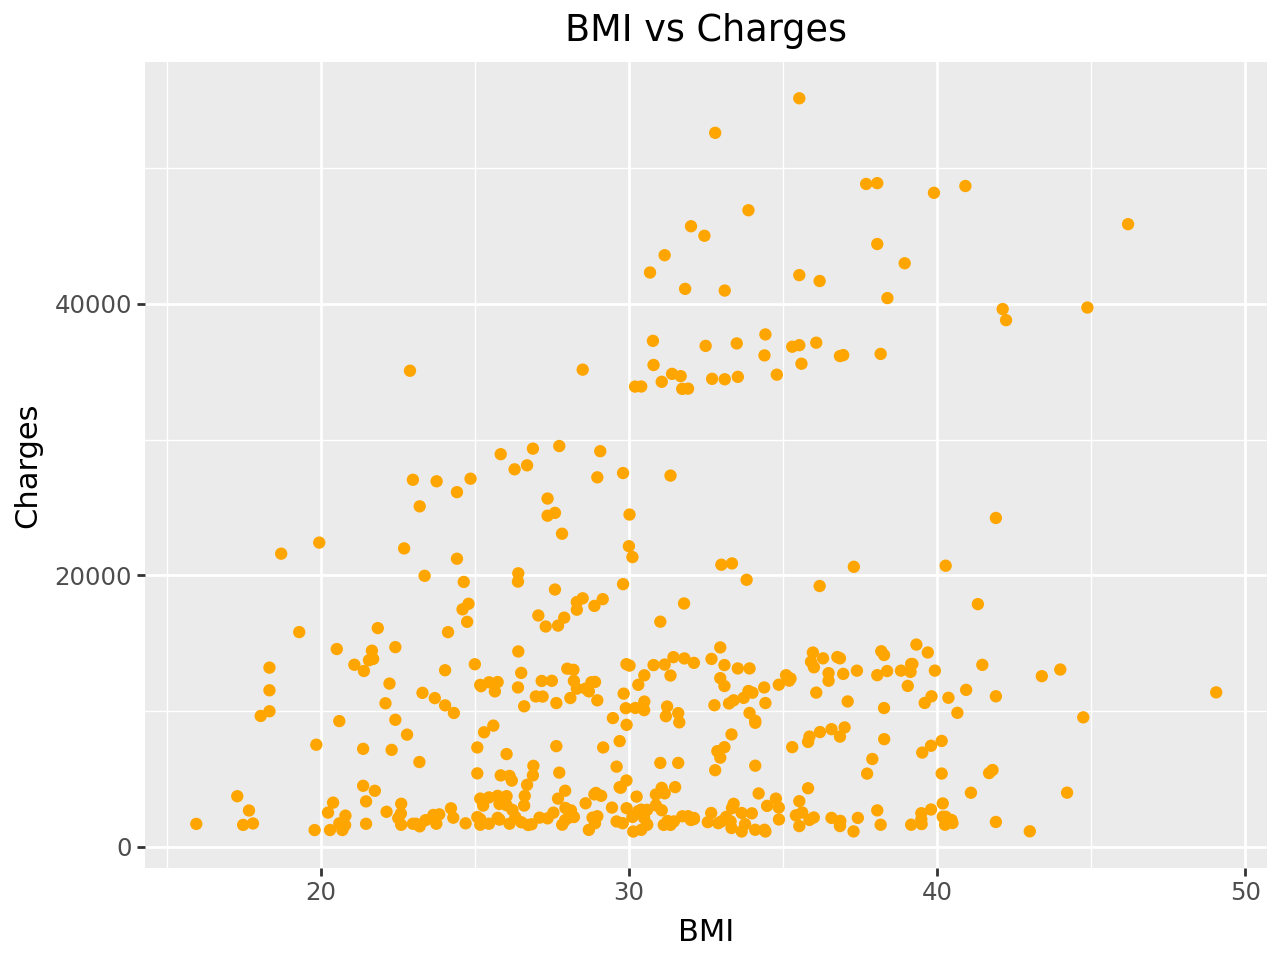

In [288]:
(ggplot(data, aes(x='bmi', y='charges')) 
        + geom_point(color="orange") 
        + labs(title="BMI vs Charges",
               x="BMI",
               y="Charges")
       )

The BMI vs charges is harder to interperet, for part of the data there is a clear increase in charges as bmi increases, but another part of the data does not show a strong increase in charges as BMI increases. I can only assume this is due to variability in how weight affects people's health.

#### Part two

1.

In [289]:
#setting up test and train
X = data.drop("charges", axis=1)
y = data[["charges"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [290]:
ctr = ColumnTransformer(
    [
    ("standardize", StandardScaler(), ["age"])
    ], remainder="drop"
).set_output(transform = "pandas")

lr_pipeline = Pipeline(
    [("preprocessing", ctr),
     ("lr", LinearRegression())]
)

In [291]:
lr_fit = lr_pipeline.fit(X_train, y_train)
y_pred_lrT = lr_fit.predict(X_train)
y_pred_lr = lr_fit.predict(X_test)


msetrain = mean_squared_error(y_train, y_pred_lrT)
msetest = mean_squared_error(y_test, y_pred_lr)
R2train = r2_score(y_train, y_pred_lrT)
R2test = r2_score(y_test, y_pred_lr)
print(msetrain)
print(msetest)
print(R2train)
print(R2test)

coefficients = lr_fit.named_steps["lr"].coef_
print("Coefficients:", coefficients)


136578863.1536188
98198739.38598363
0.09354583527906435
0.1061556527397719
Coefficients: [[3754.31795955]]


Our models fit using age to predict insurance charges is quite poor, with a R^2 on the training of 8.4% and 10.6% on the test it is capturing very little variation in charges. The MSE is also huge for both train and test, this is a unsuccessful model. For each unit of age increasing there is a predicted 3563 dollar increase in healthcare charges 

#### 2.

In [292]:
ctr2 = ColumnTransformer(
    transformers=[
        ("standardize", StandardScaler(), ["age"]),
        ("dummify", OneHotEncoder(drop='first', sparse_output=False), ["sex"])
    ],
    remainder="drop"
).set_output(transform = "pandas")

lr_pipeline2 = Pipeline(
    [("preprocessing", ctr2),
     ("lr", LinearRegression())]
)

In [293]:
lr_fit2 = lr_pipeline2.fit(X_train, y_train)
y_pred_lrT2 = lr_fit2.predict(X_train)
y_pred_lr2 = lr_fit2.predict(X_test)

msetrain2 = mean_squared_error(y_train, y_pred_lrT2)
msetest2 = mean_squared_error(y_test, y_pred_lr2)
R2train2 = r2_score(y_train, y_pred_lrT2)
R2test2 = r2_score(y_test, y_pred_lr2)
print(msetrain2)
print(msetest2)
print(R2train2)
print(R2test2)

lr_fit2.named_steps["lr"].coef_

136334361.0605966
98624905.01081324
0.09516856031415066
0.10227652214061733


array([[3740.27521651,  990.41033979]])

The models fit using age and sex to predict charges is slimilar to before, with a R^2 on the training of 9% and 10.6% on the test, it is still capturing very little variation. The MSE is also still very large for both train and test at over 98 million, this is a unsuccessful model. For each unit of age increase there is a predicted 3740 dollar increase in healthcare charges and if you are male your expected healthcare charges increase 990 dollars

#### 3.

In [294]:
ctr3 = ColumnTransformer(
    transformers=[
        ("standardize", StandardScaler(), ["age"]),
        ("dummify", OneHotEncoder(drop='first', sparse_output=False), ["smoker"])
    ],
    remainder="drop"
).set_output(transform = "pandas")

lr_pipeline3 = Pipeline(
    [("preprocessing", ctr3),
     ("lr", LinearRegression())]
)


In [295]:
lr_fit3 = lr_pipeline3.fit(X_train, y_train)
y_pred_lr3 = lr_fit3.predict(X_test)
y_pred_lrT3 = lr_fit3.predict(X_train)

msetrain3 = mean_squared_error(y_train, y_pred_lrT3)
msetest3 = mean_squared_error(y_test, y_pred_lr3)
R2train3 = r2_score(y_train, y_pred_lrT3)
R2test3 = r2_score(y_test, y_pred_lr3)
print(msetrain3)
print(msetest3)
print(R2train3)
print(R2test3)

lr_fit3.named_steps["lr"].coef_

33263256.708415247
35638855.72310154
0.7792365752699875
0.675600828176578


array([[ 4172.8371292 , 24820.57948478]])

Including sex and smoker improves the model tremendously, the MSE is showing promise since our test MSE is lower than our training MSE so the model is not overfit, and with a R^2 of 67% it explains the variability of charges quite well. 

#### 4

Without question model 3 (smoker and age) is a vast improvement over model 2, The R^2 is a huge leap going from 9% to 67% and the mean squared error is almost 60 million smaller (98624905 vs 35638855).

#### Part 3

1.

In [332]:
ctr4 = ColumnTransformer(
    transformers=[
        ("standardize", StandardScaler(), ["age", "bmi"]),
    ],
    remainder="drop"
).set_output(transform = "pandas")

lr_pipeline4 = Pipeline(
    [("preprocessing", ctr4),
     ("lr", LinearRegression())]
)


In [333]:
lr_fit4 = lr_pipeline4.fit(X_train, y_train)
y_pred_lrT4 = lr_fit4.predict(X_train)
y_pred_lr4 = lr_fit4.predict(X_test)

msetrain4 = mean_squared_error(y_train, y_pred_lrT4)
msetest4 = mean_squared_error(y_test, y_pred_lr4)
R2train4 = r2_score(y_train, y_pred_lrT4)
R2test4 = r2_score(y_test, y_pred_lr4)
print(msetrain4)
print(msetest4)
print(R2train4)
print(R2test4)

lr_fit4.named_steps["lr"].coef_

130407798.74521965
107269509.67010812
0.1345022973888923
0.023589860200504242


array([[3465.31998314, 2500.91667969]])

The R^2 is slightly improved when adding age and bmi, it improves from 8% to 13% on training, but on testing is actually a decrease from 10% to 2.3%. The MSE follows a similar trend decreasing about 6,000,000 on train, but increasing 2 million on test.



#### 2

In [298]:
def square_age(X):
    return X ** 2
ctr5 = ColumnTransformer(
    transformers=[
        ("age_bmi", StandardScaler(), ["age"]),
        ("age_squared", FunctionTransformer(square_age, validate=False), ["age"]),
    ],
    remainder="drop"
).set_output(transform = "pandas")

lr_pipeline5 = Pipeline(
    [("preprocessing", ctr5),
     ("lr", LinearRegression())]
)
#lr_pipeline2


In [299]:
lr_fit5 = lr_pipeline5.fit(X_train, y_train)
y_pred_lr5 = lr_fit5.predict(X_test)
y_pred_lrT5 = lr_fit5.predict(X_train)

msetest5 = mean_squared_error(y_test, y_pred_lr5)
msetrain5 = mean_squared_error(y_train, y_pred_lrT5)
R2test5 = r2_score(y_test, y_pred_lr5)
R2train5 = r2_score(y_train, y_pred_lrT5)
print(msetrain5)
print(msetest5)
print(R2train5)
print(R2test5)

lr_fit5.named_steps["lr"].coef_

136578729.675223
98216862.49358901
0.0935467211558757
0.10599068893892116


array([[3.66539557e+03, 6.95303359e-02]])

Adding age^2 as a predictor makes the model almost identical with  p2 q1 and this model havihaving r^2's of 9% on training and 10% on test, as well as near identical MSE's. Adding age^2 did not make any meaningful difference, it just brought it on par.



#### 3

In [300]:
def cubic(X):
    return X ** 3
def quartic(X):
    return X ** 4
ctr6 = ColumnTransformer(
    transformers=[
        ("age_bmi", StandardScaler(), ["age"]),
        ("age_squared", FunctionTransformer(square_age, validate=False), ["age"]),
        ("age_cubed", FunctionTransformer(cubic, validate=False), ["age"]),
        ("age_fourth", FunctionTransformer(quartic, validate=False), ["age"]),
    ],
    remainder="drop"
).set_output(transform = "pandas")

lr_pipeline6 = Pipeline(
    [("preprocessing", ctr6),
     ("lr", LinearRegression())]
)
#lr_pipeline2


In [301]:
lr_fit6 = lr_pipeline6.fit(X_train, y_train)
y_pred_lr6 = lr_fit6.predict(X_test)
y_pred_lrT6 = lr_fit6.predict(X_train)

msetest6 = mean_squared_error(y_test, y_pred_lr6)
msetrain6 = mean_squared_error(y_train, y_pred_lrT6)
R2test6 = r2_score(y_test, y_pred_lr6)
R2train6 = r2_score(y_train, y_pred_lrT6)
print(msetrain6)
print(msetest6)
print(R2train6)
print(R2test6)

lr_fit6.named_steps["lr"].coef_

135289716.55928132
98512498.2241305
0.10210171480823205
0.10329969383811877


array([[-1.64536972e+05,  4.36449371e+02, -7.61434329e+00,
         4.71641238e-02]])

When fitting a polynomial of degree 4 compared to P2 Q1 it is slightly better. The test MSE decreased 1 million, and test R^2 increased from 10.2% to 10.3%. 

4.

In [302]:

def quintic(X):
    return X ** 5

def sextic(X):
    return X ** 6

def septic(X):
    return X ** 7

def octic(X):
    return X ** 8

def nonic(X):
    return X ** 9

def decic(X):
    return X ** 10

def undecic(X):
    return X ** 11

def duodecic(X):
    return X ** 12
ctr7 = ColumnTransformer(
transformers=[
        ("age_bmi", StandardScaler(), ["age"]),
        ("age_squared", FunctionTransformer(square_age, validate=False), ["age"]),
        ("age_cubed", FunctionTransformer(cubic, validate=False), ["age"]),
        ("age_fourth", FunctionTransformer(quartic, validate=False), ["age"]),
        ("age_fifth", FunctionTransformer(quintic, validate=False), ["age"]),
        ("age_sixth", FunctionTransformer(sextic, validate=False), ["age"]),
        ("age_seventh", FunctionTransformer(septic, validate=False), ["age"]),
        ("age_eighth", FunctionTransformer(octic, validate=False), ["age"]),
        ("age_ninth", FunctionTransformer(nonic, validate=False), ["age"]),
        ("age_tenth", FunctionTransformer(decic, validate=False), ["age"]),
        ("age_eleventh", FunctionTransformer(undecic, validate=False), ["age"]),
        ("age_twelfth", FunctionTransformer(duodecic, validate=False), ["age"]),
    ],
    remainder="drop"
).set_output(transform = "pandas")

# Creating the pipeline
lr_pipeline7 = Pipeline(
    [("preprocessing", ctr7),
     ("lr", LinearRegression())]
)

In [303]:
lr_fit7 = lr_pipeline7.fit(X_train, y_train)
y_pred_lr7 = lr_fit7.predict(X_test)
y_pred_lrT7 = lr_fit7.predict(X_train)

msetest7 = mean_squared_error(y_test, y_pred_lr7)
msetrain7 = mean_squared_error(y_train, y_pred_lrT7)
R2test7 = r2_score(y_test, y_pred_lr7)
R2train7 = r2_score(y_train, y_pred_lrT7)
print(msetrain7)
print(msetest7)
print(R2train7)
print(R2test7)

lr_fit7.named_steps["lr"].coef_

135201343.817459
98221052.00773846
0.10268823191653864
0.10595255429927442


array([[ 7.26999632e-10,  1.64370656e-06,  7.21135146e-06,
         1.07275117e-04,  8.58883063e-04, -1.45360816e-04,
         8.68752033e-06, -2.31248672e-07,  2.83162329e-09,
        -1.30537672e-11,  2.79044417e-18,  9.55914797e-17]])

When fitting a polynomial of degree 12 i compared to P2 Q1 it is slightly better. The test MSE decreased 300000, and test R^2 increased from 10.2% to 10.6%. 

#### 5

Part Two question 4 is by far the best with train and test MSE's of 35326729 29500577, and a R^2 of 76.5% for test and 73.23% for train. All of the models in part 3 do a bad job capturing R^2, the best of the bad is the has a test MSE of 98221052 and test R^2 of 10.5%. The test R^2 is .1% higher than just using age from p2 q1, but it is better. Either way all the models in part 3 are incredibily poor with very high MSE's and very low R^2's. Significant improvement is needed for a useable model to predict charges. If one were to use the duodecic model on new data, it would be overfitted to the old data as shown in the following graph.



#### 6

In [304]:
data["lrpredict"] = lr_fit7.predict(X)

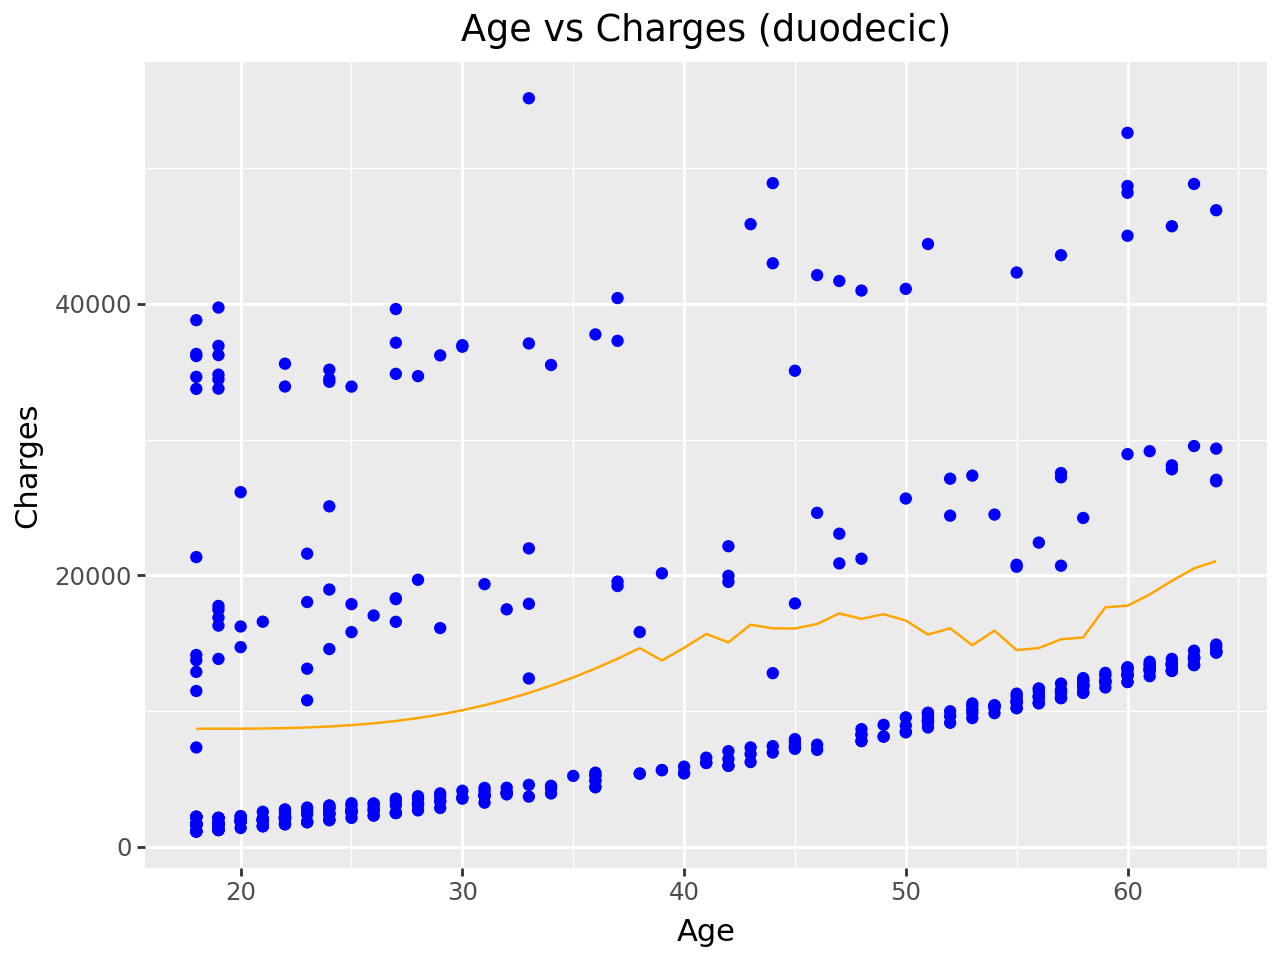

In [305]:
(ggplot(data, aes(x='age', y='charges')) +
geom_point(color="blue") + 
geom_line(aes(y='lrpredict'), color="orange") + 
 labs(
title="Age vs Charges (duodecic)",
 x="Age",
 y="Charges"
    )
)

#### Part Four 


In [306]:
data = pd.read_csv("https://www.dropbox.com/s/bocjjyo1ehr5auz/insurance_costs_1.csv?dl=1")
data = data.dropna()

myData = pd.read_csv("https://www.dropbox.com/s/sky86agc4s8c6qe/insurance_costs_2.csv?dl=1")
myData = myData.dropna()
X_trainN = data.drop("charges", axis=1)
X_testN = myData.drop("charges", axis=1)
y_trainN = data[["charges"]]
y_testN = myData[["charges"]]


Age

In [307]:
ctrN = ColumnTransformer(
   transformers = [
    ("standardize", StandardScaler(), ["age"])
    ], remainder="drop"
).set_output(transform = "pandas")

lr_pipelineN = Pipeline(
    [("preprocessing", ctrN),
     ("lr", LinearRegression())]
)
#lr_pipeline

In [308]:
lr_fitN = lr_pipelineN.fit(X_trainN, y_trainN)
y_pred_lrTN = lr_fitN.predict(X_testN)
msetestN = mean_squared_error(y_testN, y_pred_lrTN)
R2testN = r2_score(y_testN, y_pred_lrTN)
print(msetestN)
print(R2testN)



136077136.50195494
0.12236515675533055


Age and BMI

In [309]:
ctrN2 = ColumnTransformer(
  transformers = [
    ("standardize", StandardScaler(), ["age", "bmi"])
    ], remainder="drop"
).set_output(transform = "pandas")

lr_pipelineN2 = Pipeline(
    [("preprocessing", ctrN2),
     ("lr", LinearRegression())]
)
#lr_pipeline

In [310]:
lr_fitN2 = lr_pipelineN2.fit(X_trainN, y_trainN)
y_pred_lrTN2 = lr_fitN2.predict(X_testN)

msetestN2 = mean_squared_error(y_testN, y_pred_lrTN2)
R2testN2 = r2_score(y_testN, y_pred_lrTN2)
print(msetestN2)
print(R2testN2)


132636406.1108129
0.14455628272331222


Age, BMI, Smoker

In [311]:

ctrN4 = ColumnTransformer(
   transformers = [
    ("standardize", StandardScaler(), ["age", "bmi"]),
    ("dummify", OneHotEncoder(drop='first', sparse_output=False), ["smoker"])


    ], remainder="drop"
).set_output(transform = "pandas")

lr_pipelineN4 = Pipeline(
    [("preprocessing", ctrN4),
     ("lr", LinearRegression())]
)
#lr_pipeline

In [312]:
lr_fitN4 = lr_pipelineN4.fit(X_trainN, y_trainN)
y_pred_lrTN4 = lr_fitN4.predict(X_testN)

msetestN4 = mean_squared_error(y_testN, y_pred_lrTN4)
R2testN4 = r2_score(y_testN, y_pred_lrTN4)
print(msetestN4)
print(R2testN4)

35377541.24141633
0.77183115650478


age, and bmi, with both quantitative variables having an interaction term with smoker (i.e. the formula ~ (age + bmi):smoker)



In [313]:
ct_dummies = ColumnTransformer(
    [
        ("standardize", StandardScaler(), ["age", "bmi"]),
        ("dummify", OneHotEncoder(sparse_output=False), ["smoker"])   
    ],
    remainder="drop"
).set_output(transform="pandas")

ct_inter = ColumnTransformer(
    [
        ("interaction_age", PolynomialFeatures(interaction_only=True, include_bias=False), ["standardize__age", "dummify__smoker_yes"]),
        ("interaction_bmi", PolynomialFeatures(interaction_only=True, include_bias=False), ["standardize__bmi", "dummify__smoker_yes"])
    ],
    remainder="drop"
).set_output(transform = "pandas")

lr_pipelineN3 = Pipeline([
    ("dummify", ct_dummies),
    ("interactions", ct_inter),
    ("model", LinearRegression())
])

#X_train_dummified = ct_dummies.fit_transform(X_train)
#X_train_dummified

In [314]:
lr_fitN3 = lr_pipelineN3.fit(X_trainN, y_trainN)
y_pred_lrTN3 = lr_fitN3.predict(X_testN)

msetestN3 = mean_squared_error(y_testN, y_pred_lrTN3)
R2testN3 = r2_score(y_testN, y_pred_lrTN3)
print(msetestN3)
print(R2testN3)

21786256.866852526
0.8594886795699619


age, and bmi, with both quantitative variables having an interaction term with smoker (i.e. the formula ~ (age + bmi):smoker)



In [315]:
ct_dummies2 = ColumnTransformer(
    [
        ("standardize", StandardScaler(), ["age", "bmi"]),
        ("dummify", OneHotEncoder(sparse_output=False), ["smoker"])   
    ],
    remainder="passthrough"
).set_output(transform="pandas")

ct_inter2 = ColumnTransformer(
    [
        ("interaction_age", PolynomialFeatures(interaction_only=True, include_bias=False), ["standardize__age", "dummify__smoker_yes"]),
        ("interaction_bmi", PolynomialFeatures(interaction_only=True, include_bias=False), ["standardize__bmi", "dummify__smoker_yes"]),
        ("passthrough", "passthrough", ["standardize__age", "standardize__bmi", "dummify__smoker_yes"])
    ],
    remainder="drop"
).set_output(transform = "pandas")

lr_pipelineN5 = Pipeline([
    ("dummify", ct_dummies2),
    ("interactions", ct_inter2),
    ("model", LinearRegression())
])

#X_train_dummified = ct_dummies2.fit_transform(X_train)
#X_train_dummified

In [ ]:
lr_fitN5 = lr_pipelineN5.fit(X_trainN, y_trainN)
y_pred_lrTN5 = lr_fitN5.predict(X_testN)

msetestN5 = mean_squared_error(y_testN, y_pred_lrTN5)
R2testN5 = r2_score(y_testN, y_pred_lrTN5)
print(msetestN5)
print(R2testN5)


21792230.16455884
0.859450154551499


My fourth model (age + bmi):smoker had the lowest MSE at 21786256 vs model 5 = 21792230, model 3 =35377541, model 2 = 132636406, model 1 132636406. This makes it the best model for predicting charges and I used it's predictions below to plot residuals.

plot of residuals

In [323]:
Residuals["Residuals"] = y_testN - y_pred_lrTN3
Residuals["Predicted"] = lr_fitN3.predict(X_testN)
Residuals["Smoker"] = myData["smoker"]
Residuals = Residuals[['Predicted', 'Smoker', 'Residuals']]
#Residuals

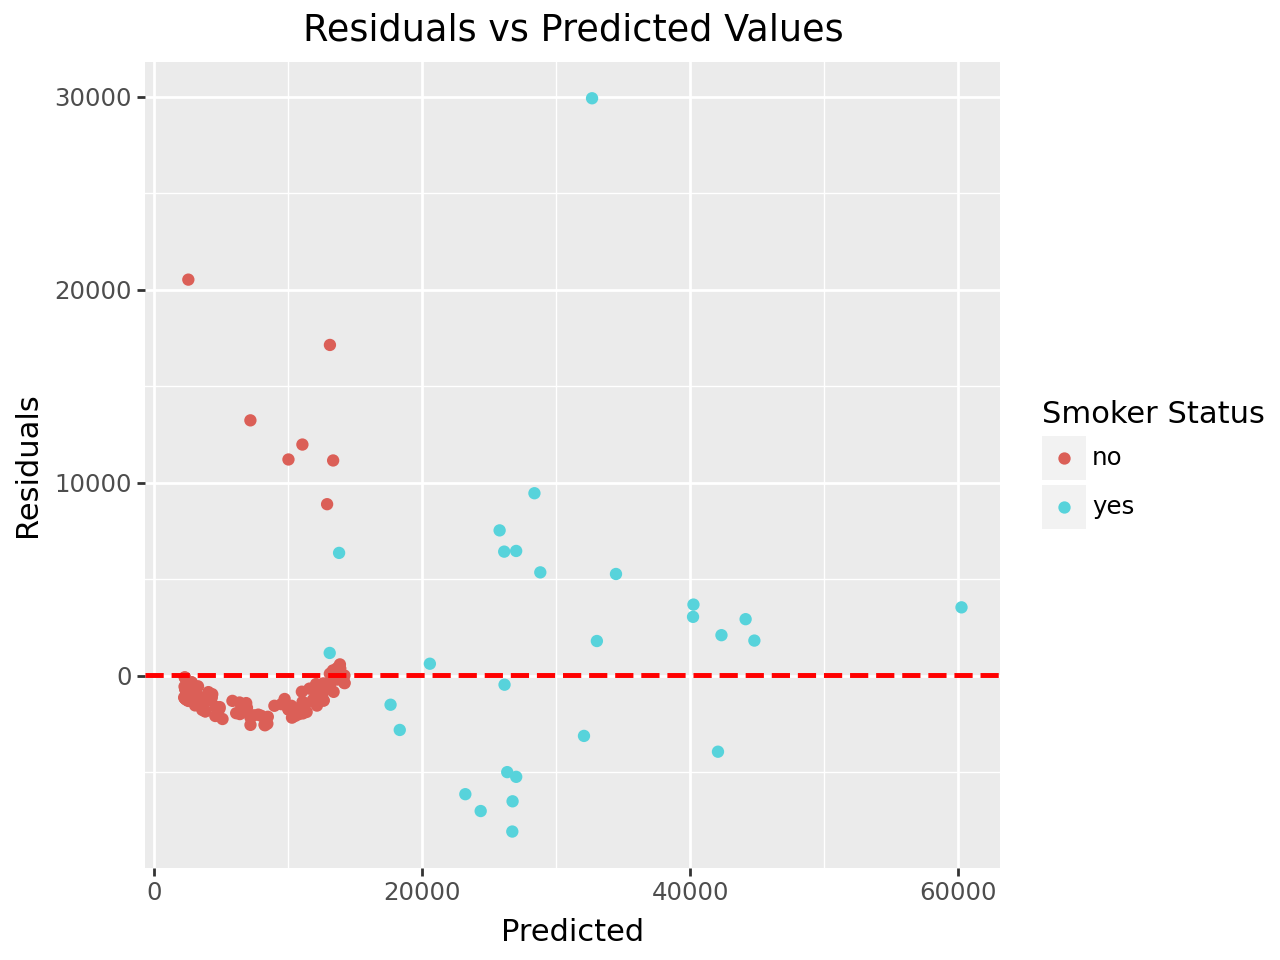

In [334]:
(
    ggplot(Residuals, aes(x='Predicted', y='Residuals', color='Smoker')) +
    geom_point() +
    geom_hline(yintercept = 50, color = "red", linetype = "dashed", size = 1) +

    labs(
        title='Residuals vs Predicted Values',
        x='Predicted',
        y='Residuals',
        color='Smoker Status'
    ) +
    theme()
)

#### Part Five

In [ ]:
ct_dummiesF = ColumnTransformer(
    transformers=[
        ("standardize", StandardScaler(), ["age", "bmi"]),
        ("dummify_smoker", OneHotEncoder(drop='first', sparse_output=False), ["smoker"]),
        ("dummify_sex", OneHotEncoder(drop='first', sparse_output=False), ["sex"]),
        ("dummify_region", OneHotEncoder(drop='first', sparse_output=False), ["region"]),
        ("age_squared", FunctionTransformer(square_age, validate=False), ["age"]),
        ("bmi_squared", FunctionTransformer(square_age, validate=False), ["bmi"])
    ],
    remainder="drop"
).set_output(transform="pandas")

ct_interF = ColumnTransformer(
    transformers=[
        ("interaction_age_smoker", PolynomialFeatures(interaction_only=True, include_bias=False), ["standardize__age", "dummify_smoker__smoker_yes"]),
        ("interaction_bmi_smoker", PolynomialFeatures(interaction_only=True, include_bias=False), ["standardize__bmi", "dummify_smoker__smoker_yes"]),
        ("interaction_bmi", PolynomialFeatures(interaction_only=True, include_bias=False), ["standardize__bmi", "standardize__age"]),
        ("passthrough", "passthrough", ["standardize__age", "standardize__bmi", "dummify_sex__sex_male", "dummify_smoker__smoker_yes", "age_squared__age", "bmi_squared__bmi"])
    ],
    remainder="drop"
).set_output(transform="pandas")


lr_pipelineF = Pipeline([
    ("dummify", ct_dummiesF),         
    ("interactions", ct_interF),     
    ("model", LinearRegression())     
])
#X_train_dummified = ct_dummiesF.fit_transform(X_train)
#X_train_dummified


,standardize__age,standardize__bmi,dummify_smoker__smoker_yes,dummify_sex__sex_male,dummify_region__region_northwest,dummify_region__region_southeast,dummify_region__region_southwest,age_squared__age,bmi_squared__bmi
68,1.346346,-0.726759,0.0,1.0,0.0,1.0,0.0,3481,696.960000
334,1.346346,-0.881956,0.0,1.0,1.0,0.0,0.0,3481,648.211600
41,-1.068909,-0.301616,0.0,0.0,1.0,0.0,0.0,400,839.550625
329,-0.821191,-1.697569,1.0,0.0,0.0,0.0,0.0,576,421.070400
279,-0.078035,0.115271,0.0,1.0,0.0,0.0,1.0,1296,992.250000
...,...,...,...,...,...,...,...,...,...
202,-1.192768,1.379967,0.0,0.0,0.0,1.0,0.0,324,1533.505600
43,-0.945050,-0.454337,0.0,0.0,0.0,1.0,0.0,484,786.802500
225,-0.511542,0.059136,0.0,0.0,0.0,0.0,0.0,841,970.945600
85,-1.130839,0.184615,1.0,1.0,1.0,0.0,0.0,361,1018.886400


In [ ]:
lr_fitNF = lr_pipelineF.fit(X_trainN, y_trainN)
y_pred_lrTNF = lr_fitNF.predict(X_testN)

msetestNF = mean_squared_error(y_testN, y_pred_lrTNF)
R2testNF = r2_score(y_testN, y_pred_lrTNF)
print("Mean Squared Error:", msetestNF)
print("R^2 Score:", R2testNF)


Mean Squared Error: 21721024.291163437
R^2 Score: 0.8599093996322078


The best model I found included standardized age, bmi, age^2, bmi^2, smoker, sex, and interactions between age* smoker, bmi* smoker, bmi* age. It gave me the lowest MSE at 21721024 and R^2 at 85.99%. It gives a very strong R^2 and low MSE compared to all other models when trained on the old data and tested on the new data so I believe it will predict charges on new data well. At this level the returns by adding more predictors were diminishing between all of the different variations I tried got a R^2 of between 83% and 85.9%

Chat-GPT 4o was used to suggest how to include the sqaured in part 2 as well as debug errors.